In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

#For standardization
from sklearn import preprocessing
#For dividing the dataset into train and test sets  
from sklearn.model_selection import train_test_split    
#For checking MSE and r^2 values   
from sklearn.metrics import r2_score, mean_squared_error
#For the OLS results
from sklearn.linear_model import LinearRegression  

In [2]:
#load avertising data
df = pd.read_csv("data/Advertising.csv", index_col = 0)
#print size
print("Data size is: ", df.shape)
#display first five rows of the data
df.head()

Data size is:  (200, 4)


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [3]:
df.describe() # describe functions is used to get the summary of the data


,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


Standardizing columns of the dataset.

In [4]:
temp_data = df.copy() # temporary dataset containing standarized values

# tv standardized values
tv_mean = temp_data['TV'].mean()
tv_std = temp_data['TV'].std()
temp_data['TV'] = (temp_data['TV'] - tv_mean) / tv_std

# radio standardized values
radio_mean = temp_data['Radio'].mean()
radio_std = temp_data['Radio'].std()
temp_data['Radio'] = (temp_data['Radio'] - radio_mean) / radio_std

# newspater standardized values
news_mean = temp_data['Newspaper'].mean()
news_std = temp_data['Newspaper'].std()
temp_data['Newspaper'] = (temp_data['Newspaper'] - news_mean) / news_std

# sales standardized values
sales_mean = temp_data['Sales'].mean()
sales_std = temp_data['Sales'].std()
temp_data['Sales'] = (temp_data['Sales'] - sales_mean) / sales_std

temp_data

,TV,Radio,Newspaper,Sales
1,0.967425,0.979066,1.774493,1.548168
2,-1.194379,1.080097,0.667903,-0.694304
3,-1.512360,1.524637,1.779084,-0.905135
4,0.051919,1.214806,1.283185,0.858177
5,0.393196,-0.839507,1.278593,-0.215143
...,...,...,...,...
196,-1.267759,-1.317724,-0.769287,-1.230964
197,-0.615491,-1.236899,-1.031011,-0.828469
198,0.348934,-0.940539,-1.109069,-0.234310
199,1.590574,1.261955,1.636743,2.199827


Acquired data used with sklearn.

In [5]:
# sklearn preprocessing.scale function
df_standardize = preprocessing.scale(df)

#Convert standardized data to dataset
df_standardize = pd.DataFrame(df_standardize, columns = df.columns)

df_standardize

,TV,Radio,Newspaper,Sales
0,0.969852,0.981522,1.778945,1.552053
1,-1.197376,1.082808,0.669579,-0.696046
2,-1.516155,1.528463,1.783549,-0.907406
3,0.052050,1.217855,1.286405,0.860330
4,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...
195,-1.270941,-1.321031,-0.771217,-1.234053
196,-0.617035,-1.240003,-1.033598,-0.830548
197,0.349810,-0.942899,-1.111852,-0.234898
198,1.594565,1.265121,1.640850,2.205347


Adding extra column composing of all ones to X.

In [6]:
df_standardize.insert(0, 'all_ones', 1)
df_standardize

,all_ones,TV,Radio,Newspaper,Sales
0,1,0.969852,0.981522,1.778945,1.552053
1,1,-1.197376,1.082808,0.669579,-0.696046
2,1,-1.516155,1.528463,1.783549,-0.907406
3,1,0.052050,1.217855,1.286405,0.860330
4,1,0.394182,-0.841614,1.281802,-0.215683
...,...,...,...,...,...
195,1,-1.270941,-1.321031,-0.771217,-1.234053
196,1,-0.617035,-1.240003,-1.033598,-0.830548
197,1,0.349810,-0.942899,-1.111852,-0.234898
198,1,1.594565,1.265121,1.640850,2.205347


 Divide the dataset into training and testing, with 0.85 and 0.25 ratio, respectively.

In [7]:
# type of advertising selection
features = df_standardize[['all_ones', 'TV', 'Radio', 'Newspaper']]
target = df_standardize['Sales'] # target - sales column dependent variable
# 0.85 ratio for training and 0.25 ratio for testing
X_train, X_test, y_train, y_test = train_test_split(features, target, train_size = 0.75, test_size = 0.25)


ratio is changed to 0.75 for training because 0.85 causes an error

Fit the model on the training set. Required Functions

 initialize_weights

In [8]:
def initialize_weights(X, random = False):
    X_len = X.shape[1] # number of columns in x is equal to the weight lengths
    if random: # if the length is random, it will be initialized randomly too
        return np.random.rand(X_len)
    return np.zeros(X_len) # else return zero or initialized to zero

In [9]:
# function testing
weights = initialize_weights(X_train, random = True)
weights

array([0.00649393, 0.64187044, 0.26814734, 0.18595929])

In [10]:
weights = initialize_weights(X_train)
weights

array([0., 0., 0., 0.])

predict: returns a vector of the predicted values 

In [11]:
def predict(X, weights):
    #Using numpy's dot product function to multiply every weight to its interrelated feature from x
    return np.dot(X, weights)

In [12]:
#Predict the training set's values using a random set of weights
y_hat_train = predict(X_train, initialize_weights(X_train, random = True))

# comparing predicted and actual values
df_train = pd.DataFrame({'Actual Values': y_train, 'Predicted Values': y_hat_train})
df_train

,Actual Values,Predicted Values
193,1.071690,0.627489
147,2.186132,2.053090
122,-0.465472,-0.566621
55,1.859486,2.506248
171,0.091749,1.041238
...,...,...
131,-0.254112,0.228504
137,1.302264,1.709270
130,-2.386924,0.661145
36,2.186132,0.746908


compute_cost: returns a scalar value that tells us how accurate the model is.

In [13]:
def compute_cost(X, y, weights):  
    m = len(y) # length of the response
    
    cost_function = 1/(2*m) * np.sum((predict(X, weights) - y)**2)
    return cost_function

In [14]:
#Print the cost function of the training set utilizing a random set of weights
cost_test = compute_cost(X_train, y_train, initialize_weights(X_train, random = True))
print(cost_test)

0.5713384974752551


compute_gradient:

In [15]:
def compute_gradient(X, y, weights):
    m = len(y)
    w = 1/m * np.dot(X.T, (predict(X, weights) - y))

    return w     #returns matrix w

update_weights: returns a 4x1 matrix that contains the updated weights. 

In [16]:
def update_weights(X, y, weights, alpha):
    return weights - alpha * compute_gradient(X, y, weights)

grad_descent: returns 2 matrices: one matrix for the weights, and one matrix for the 
cost values per iteration.

In [17]:
def grad_descent(X, y, weights, alpha, iterations):  #Initialization of the two matrices
    weights_matrix = [0] * iterations
    cost_matrix = [0] * iterations

    for j in range(iterations):  # Looping through the no. of iterations and utilizing batch gradient descent
        weights = update_weights(X, y, weights, alpha)     #Updating weights
        weights_matrix[j] = weights #Store the weights in the weights matrix
        cost = compute_cost(X, y, weights)  #Computing cost
        cost_matrix[j] = cost  #Store the cost in the cost matrix
    return weights_matrix, cost_matrix

plot_costs: plot the costs as a function of iteration.

In [18]:
def plot_costs(cost_array): #Size of the plot
    plt.figure(figsize=(15,8))
    plt.plot(cost_array)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost over Iterations')
    plt.show()

Predict y for train set and calculate the cost.

In [19]:
weights = initialize_weights(X_train, random = True)
y_hat_train = predict(X_train, weights)
y_hat_train_df = pd.DataFrame({'Actual Values': y_train, 'Predicted Values': y_hat_train})
y_hat_train_df

,Actual Values,Predicted Values
193,1.071690,0.784684
147,2.186132,2.290758
122,-0.465472,-0.240004
55,1.859486,2.109259
171,0.091749,0.420657
...,...,...
131,-0.254112,0.501718
137,1.302264,1.902576
130,-2.386924,-0.748216
36,2.186132,1.780652


In [20]:
# formula for getting the cost of the predicted values
train_cost = compute_cost(X_train, y_train, weights)
train_cost

0.11417052423188868

Predict y for test set and calculate the cost.

In [21]:
weights = initialize_weights(X_test, random = True)
y_hat_test = predict(X_test, weights)
y_hat_test_df = pd.DataFrame({'Actual Values': y_test, 'Predicted Values': y_hat_test})
y_hat_test_df['Residual Values'] = y_hat_test_df['Actual Values'] - y_hat_test_df['Predicted Values']
y_hat_test_df

,Actual Values,Predicted Values,Residual Values
187,0.629756,0.485105,0.144651
67,-0.119610,-0.304583,0.184973
15,1.609697,1.047117,0.562580
196,-0.830548,-0.916625,0.086078
104,1.283050,0.977250,0.305800
149,-0.753690,-0.874394,0.120704
6,-0.427043,-0.602547,0.175504
165,-0.407828,0.578764,-0.986592
23,0.283895,0.597719,-0.313825
138,-0.849762,-0.887827,0.038065


In [22]:
# formula for getting the cost of the predicted values
test_cost = compute_cost(X_test, y_test, weights)
test_cost

0.06940927621752278

Application Part 6: Predict the quantitative response y on the train set. Evaluate performance. You can use 
the MSE cost function defined for the gradient descent.

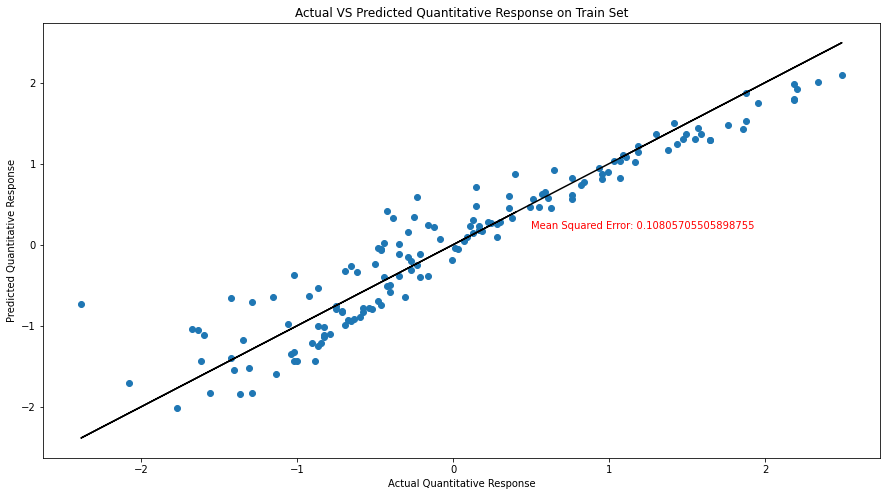

In [23]:
weights = initialize_weights(X_train, random = True)

# variable for alpha and iteration
alpha = 0.01
iterations = 10000 

# running gradient descent algorithm for training and testing
weights_matrix_training, cost_matrix_training = grad_descent(X_train, y_train, weights, alpha, iterations)
weights_matrix_testing, cost_matrix_testing = grad_descent(X_test, y_test, weights, alpha, iterations)

# predicting the quantitative response using the train set
y_hat_train = predict(X_train, weights_matrix_training[-1])

# plotting the actual and predicted response of the train set
plt.figure(figsize=(15,8))
plt.xlabel('Actual Quantitative Response')
plt.ylabel('Predicted Quantitative Response')
plt.title('Actual VS Predicted Quantitative Response on Train Set')
plt.scatter(y_train, y_hat_train)
plt.plot(y_train, y_train, color="black")
plt.text(0.5, 0.20, f"Mean Squared Error: {mean_squared_error(y_train, y_hat_train)}", color='red')
plt.show()

Evaluation: We can see that the mean squared error is 0.77 This means that values closer to 0 indicates how accurate the model is meaning this model could be considered good since 0.77 is close to 0.

Application Part 7: predict the quantitative response y on the test set. Evaluate performance. Similarly, you can use the MSE cost function defined for the gradient descent.

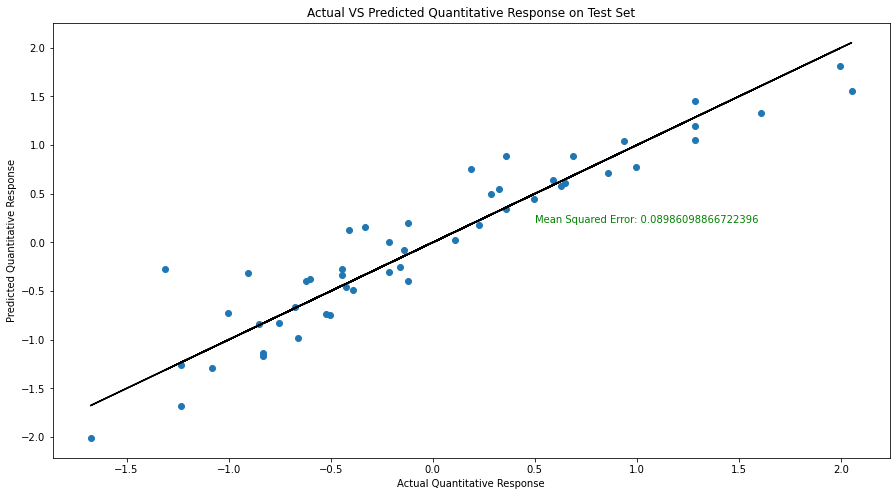

In [24]:
# predicting the quantitative response using the test set this time
y_hat_test = predict(X_test, weights_matrix_training[-1])

# plotting the actual and predicted response of the test set
plt.figure(figsize=(15,8))
plt.xlabel('Actual Quantitative Response')
plt.ylabel('Predicted Quantitative Response')
plt.title('Actual VS Predicted Quantitative Response on Test Set')
plt.scatter(y_test, y_hat_test)
plt.plot(y_test, y_test, color="black")
plt.text(0.5, 0.20, f"Mean Squared Error: {mean_squared_error(y_test, y_hat_test)}", color='green')
plt.show()

Evaluation: The Mean squared error is 0.18. This means that the model has a good accuracy this time only that the mse in the dataset is greatyer than the train set indicating its not better.

Application Part 8: Predict the sales on the actual data set this time.

In [25]:
df_standardize

#Add a new column which is the predicted sales
df_standardize['Predicted Sales'] = predict(df_standardize[['all_ones', 'TV', 'Radio', 'Newspaper']], weights_matrix_training[-1])

#Revert back the standardized data into the original form 
df_standardize['TV'] = df_standardize['TV'] * df['TV'].std() + df['TV'].mean()
df_standardize['Radio'] = df_standardize['Radio'] * df['Radio'].std() + df['Radio'].mean()
df_standardize['Newspaper'] = df_standardize['Newspaper'] * df['Newspaper'].std() + df['Newspaper'].mean()
df_standardize['Sales'] = df_standardize['Sales'] * df['Sales'].std() + df['Sales'].mean()
df_standardize['Predicted Sales'] = df_standardize['Predicted Sales'] * df['Sales'].std() + df['Sales'].mean()

#Insert Residuals column
df_standardize['Residuals'] = df_standardize['Sales'] - df_standardize['Predicted Sales']

# Drop all_ones column
df_standardize.drop('all_ones', axis = 1, inplace = True)

df_standardize

,TV,Radio,Newspaper,Sales,Predicted Sales,Residuals
0,230.308426,37.836477,69.296979,22.120270,20.819279,1.300991
1,44.242678,39.340241,45.136502,10.390910,12.336201,-1.945291
2,16.874171,45.956803,69.397230,9.288149,12.408828,-3.120679
3,151.511186,41.345260,58.570128,18.511236,17.757845,0.753391
4,180.884712,10.768723,58.469877,12.897183,13.443203,-0.546019
...,...,...,...,...,...,...
195,37.926869,3.650906,13.757957,7.583883,5.264236,2.319647
196,94.067396,4.853917,8.043654,9.689153,8.069543,1.619610
197,177.075176,9.264959,6.339388,12.796932,12.738451,0.058481
198,283.942679,42.047016,66.289451,25.528802,24.079623,1.449178


Application Part 9: Observe the cost results and analyse.

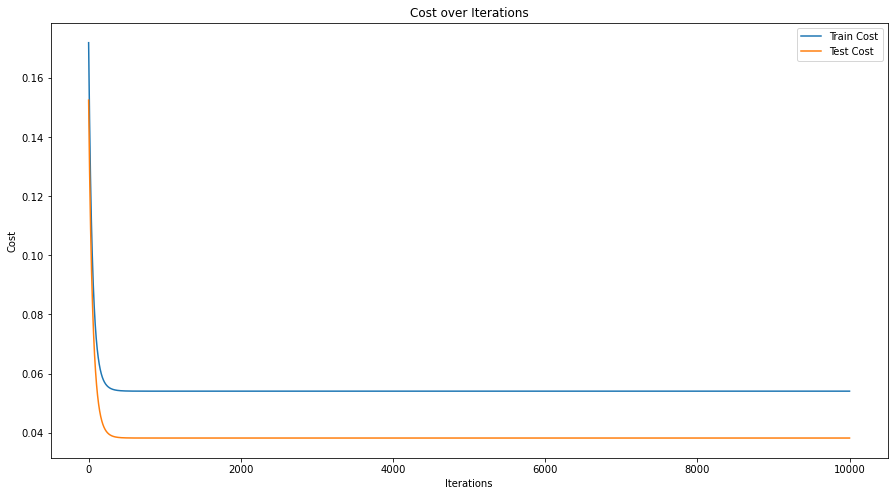

In [26]:
plt.figure(figsize=(15,8))
plt.plot(cost_matrix_training, label='Train Cost')
plt.plot(cost_matrix_testing, label='Test Cost')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost over Iterations')
plt.legend()
plt.show()

What I can see here in the plot is that the model becomes less accurate if there is only less iterations.

Additional Questions:

1. What are the optimal weights found by your implemented gradient descent? Plug it into the linear model:
What are your interpretations regarding the formed linear model?

In [38]:
w = initialize_weights(X_train)

alpha = 0.01    
iterations = 50000                                                  


we, co = grad_descent(X_train, y_train, w, alpha, iterations)

optimal_weights = we[-1]


print(f"Optimal Weights: {optimal_weights}") #Printing the optimal weights

#Plugging it into the linear model
print(f"hΘ(x) = {optimal_weights[0]} + {optimal_weights[1]}*TV + {optimal_weights[2]}*Radio + {optimal_weights[3]}*Newspaper")

Optimal Weights: [0.00685464 0.76474242 0.52854139 0.01988962]
hΘ(x) = 0.00685464018229659 + 0.7647424187049167*TV + 0.5285413893675475*Radio + 0.019889618222027287*Newspaper


2. Provide a scatter plot

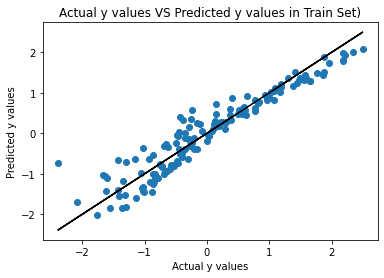

In [44]:
# train set actual values vs predicted
predict_train = predict(X_train, optimal_weights)
plt.scatter(y_train, predict_train)
plt.xlabel('Actual y values')
plt.ylabel('Predicted y values')
plt.title('Actual y values VS Predicted y values in Train Set)')
plt.plot(y_train, y_train, color='Black')
plt.show()

Is there a trend? Provide an r2 score

In [40]:
print(f"The r2 score is {r2_score(y_train, predict_train)}")

The r2 score is 0.900351707212063


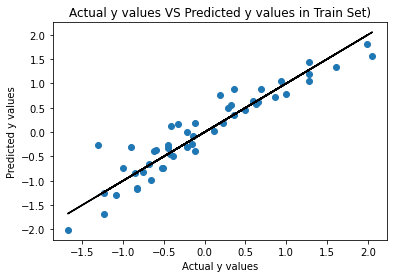

In [45]:
#test set actual value vs predicted value
predict_test = predict(X_test, optimal_weights)
plt.scatter(y_test, predict_test)
plt.xlabel('Actual y values')
plt.ylabel('Predicted y values')
plt.title('Actual y values VS Predicted y values in Train Set)')
plt.plot(y_test, y_test, color='black')
plt.show()

In [46]:
print(f"The r2 score is {r2_score(y_test, predict_test)}")

The r2 score is 0.8794849323388011


3. What happens to the error, r2, and cost as the number of iterations increase? Show your 
data and proof. You can alternatively plot your result data for visualization and check 
until 50000 iterations or more (actually)

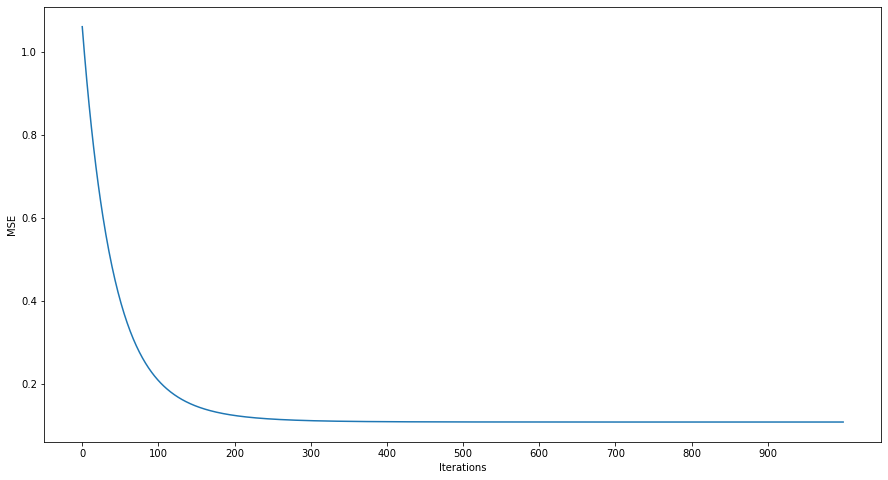

In [30]:
MSE_arr = []
for j in range(iterations):
    MSE = mean_squared_error(y_train, predict(X_train, we[j]))
    MSE_arr.append(MSE)


plt.figure(figsize=(15,8))
plt.plot(MSE_arr[0:1000])
plt.xlabel('Iterations')
plt.ylabel('MSE')
plt.xticks(np.arange(0, 1000, 100))
plt.show()

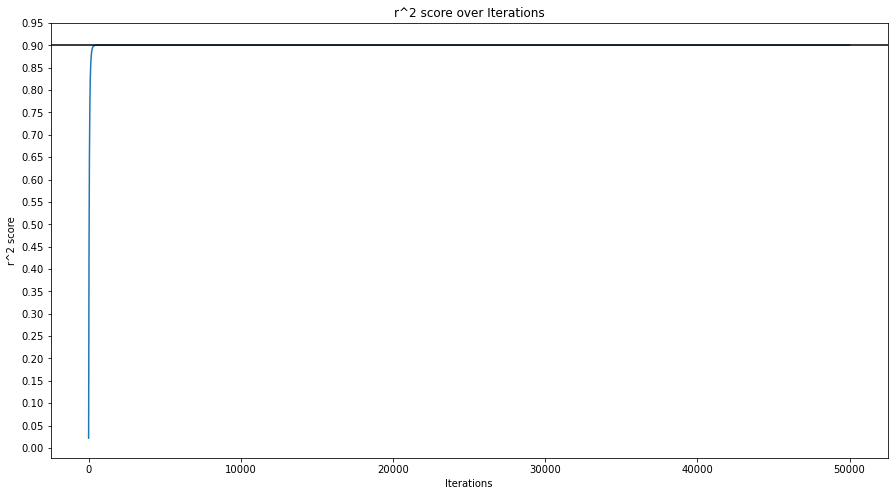

The maximum r^2 score is 0.9003517072120631


In [31]:
r2_arr = []
for j in range(iterations):
    r2 = r2_score(y_train, predict(X_train, we[j]))
    r2_arr.append(r2)

plt.figure(figsize=(15,8))
plt.plot(r2_arr)
plt.xlabel('Iterations')
plt.ylabel('r^2 score')
plt.title('r^2 score over Iterations')
plt.yticks(np.arange(0, 1, 0.05))
plt.axhline(y=max(r2_arr), color='black')
plt.show()

print(f"The maximum r^2 score is {max(r2_arr)}")

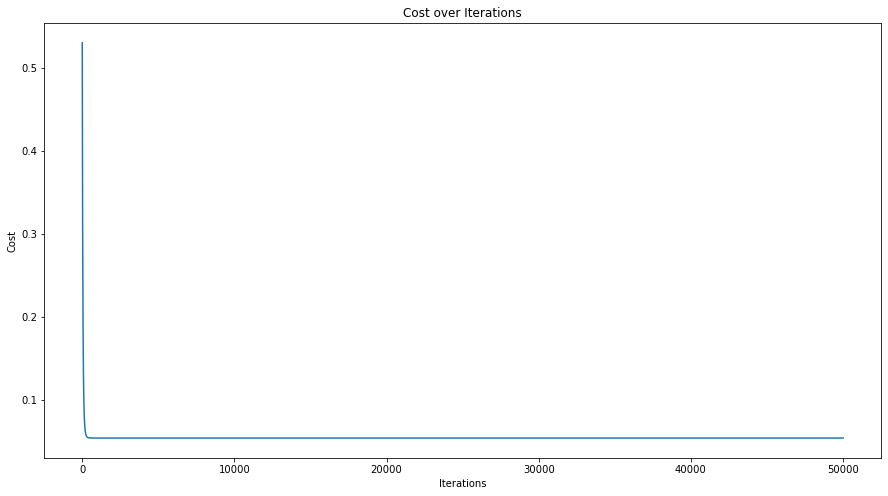

In [32]:
# cost over iterations plot
plot_costs(co)

In [33]:
# number of optimal iterations
def optimal_iterations(max_r2, r2_arr):
    for j in range(len(r2_arr)):
        if r2_arr[j] == max_r2:
            return j

optimal_num = optimal_iterations(max(r2_arr), r2_arr)
print(f"The optimal number of iterations is {optimal_num}")

The optimal number of iterations is 2961


In [34]:
# determining the cost and weights at the optimal iterations and 
print(f"The cost at the optimal number of iterations is {co[optimal_num]}")
print(f"The weights at the optimal number of iterations are {we[optimal_num]}\n")
#Last iteration
print(f"The cost at the last iteration is {co[-1]}")
print(f"The weights at the last iteration are {we[-1]}")

The cost at the optimal number of iterations is 0.05402852752949377
The weights at the optimal number of iterations are [0.00685464 0.76474242 0.52854139 0.01988962]

The cost at the last iteration is 0.054028527529493775
The weights at the last iteration are [0.00685464 0.76474242 0.52854139 0.01988962]


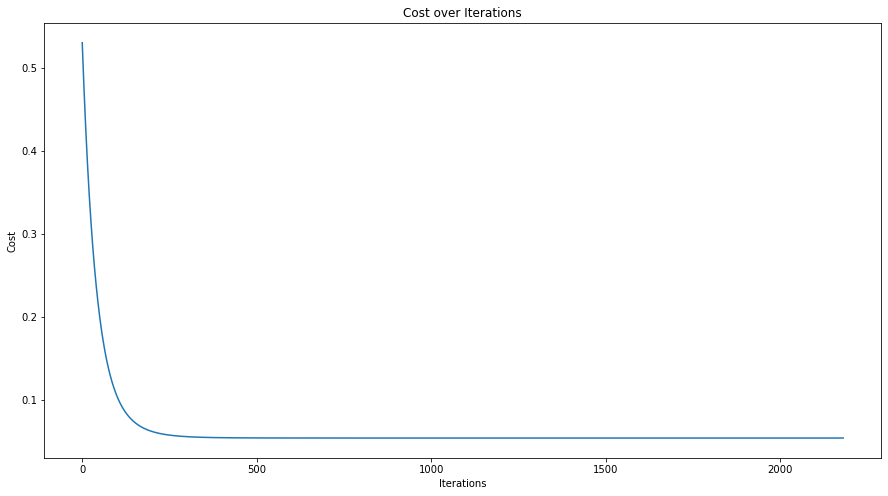

In [35]:
#Optimized Gradient Descent Algorithm
def optimized_gda(X, y, weights, alpha, iterations, diff_threshold):
    last_iter = 0
    we = []
    co = []

    for j in range(iterations):
        weights = update_weights(X, y, weights, alpha)
        we.append(weights)
        cost = compute_cost(X, y, weights)
        co.append(cost)

        if j > 0 and diff_threshold > abs(co[j] - co[j - 1]):
            last_iter = j
            break
        last_iter = j
    
    return we, co, last_iter

iterations = 50000
alpha = 0.01

diff_threshold = 1.0e-15

we, co, optimal_iterations = optimized_gda(X_train, y_train, w, alpha, iterations, diff_threshold)

plot_costs(co)

4 . Once you determine the optimal number of iterations, check the effect on the cost and 
error as you change the learning rate. The common learning rates in machine learning 
include 0.1, 0.01, 0.001, 0.0001, 0.2 but you have the option to include others. Visualize
the cost function (vs the optimal number of iterations) of each learning rate in ONLY ONE 
PLOT. Provide your analysis.

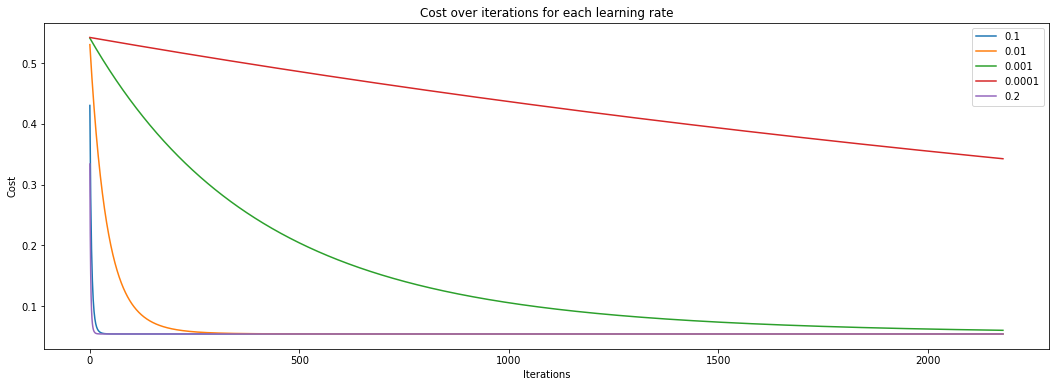

In [36]:
w = initialize_weights(X_train)

iterations = optimal_iterations

learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.2]

cost_dict = {j:0 for j in learning_rates}
error_dict = {j:0 for j in learning_rates}
co_dict = {j:[] for j in learning_rates}

for alpha in learning_rates:
    we, co = grad_descent(X_train, y_train, w, alpha, iterations)
    cost_dict[alpha] = co[-1]
    from sklearn.metrics import mean_squared_error
    error_dict[alpha] = mean_squared_error(y_train, predict(X_train, we[-1]))
    co_dict[alpha] = co

plt.figure(figsize=(18,6))
for alpha in learning_rates:
    plt.plot(co_dict[alpha], label = alpha)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Cost over iterations for each learning rate')
plt.legend()
plt.show()

In [37]:
learning_rates = pd.DataFrame({'Learning Rate': list(cost_dict.keys()), 'Cost': list(cost_dict.values()), 'Error': list(error_dict.values())})
learning_rates

,Learning Rate,Cost,Error
0,0.1000,0.054029,0.108057
1,0.0100,0.054029,0.108057
2,0.0010,0.060055,0.120110
3,0.0001,0.342502,0.685004
4,0.2000,0.054029,0.108057


5. Is there a relationship on the learning rate and the number of iterations?

In [ ]:
w = initialize_weights(X_train)

iterations = 1_000_000

learning_rates = [0.1, 0.01, 0.001, 0.0001, 0.2]

cost_dict = {j:0 for j in learning_rates}
error_dict = {j:0 for j in learning_rates}
co_dict = {j:[] for j in learning_rates}
opt_dict = {j:0 for j in learning_rates}

diff_threshold = 1.0e-15

for alpha in learning_rates:
    we, co, optimal_iterations = optimized_gda(X_train, y_train, w, alpha, iterations, diff_threshold)

    cost_dict[alpha] = co[-1]
    from sklearn.metrics import mean_squared_error
    error_dict[alpha] = mean_squared_error(y_train, predict(X_train, we[-1]))
    co_dict[alpha] = co
    opt_dict[alpha] = optimal_iterations

In [ ]:
    plt.figure(figsize=(18,6))
    for alpha in learning_rates:
        plt.plot(co_dict[alpha], label = alpha)
    plt.xlabel('Iterations')
    plt.ylabel('Cost')
    plt.title('Cost over iterations for each learning rate')
    plt.legend()
    plt.show()

 6. Compare the results with the results of ordinary least squares function. 

In [ ]:
from sklearn.linear_model import LinearRegression
ordinary_least_squares = LinearRegression()
ordinary_least_squares.fit(X_train, y_train).coef_
r2_OLS = r2_score(y_train, ordinary_least_squares.predict(X_train))
r2_GDA = r2_arr[-1]

print(f"The results of OLS is {r2_OLS}")
print(f"The results of GDA is {r2_GDA}")